# Image enhancement in the spatial domain

In the following unit we will start reviewing something called filter, this could help us to enhance image so we can improve what we are seeing.
For future reference we have to work all kind of image processing using the following procedure. 

-Preprocessing: This is the part that we will review on this material since we would use it to enhance an image even before working on it.

-Processing: During this process the image gets processed being this moment where the image can actually morphologically change.

-Post-processing : After the changes made on the previous steps we can add some tools on the image depending on its application.


In [3]:
#On this cell you will find the actual libraries that you have to use for this kind of filters and also you can add a path to see how each filltyer effect it.

import cv2
import numpy as np
import matplotlib.pyplot as plt


#Loading the image
image = cv2.imread('//home//jose//Downloads//image_enhancement//images//image1.jpg', cv2.IMREAD_GRAYSCALE)

**Negative transformation**

The negative transformation inverts the pixel values of the image, producing a photo-negative effect.

In [4]:

# Apply negative transformation
negative_image = cv2.bitwise_not(image)


**Power transformation**

Power transformation applies a gamma correction to the image. This is often used for image enhancement.

In [5]:
# Apply power transformation
gamma = 2.0
power_transformed_image = np.array(255 * (image / 255) ** gamma, dtype='uint8')


**Piecewise transformation**

Piecewise transformations apply different transformations to different ranges of pixel values. For example, this can be used to enhance contrast in specific parts of the image.

In [6]:
def piecewise_transform(value):
    if value < 85:
        return value * 0.5
    elif value < 170:
        return value * 1.5
    else:
        return value * 0.8

piecewise_image = np.array([piecewise_transform(pixel) for pixel in image.flat], dtype='uint8').reshape(image.shape)




**Difference**

The difference operation subtracts one image from another, which can be used to detect changes between two images.

In [7]:
# Load another image to compare
image2 = cv2.imread('//home//jose//github//image_enhancement//images//image2.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the difference
difference = cv2.absdiff(image, image2)

**Average**

Calculating the average of two images can be used to blend them together.

In [8]:
# Calculate the average of two images
average_image = cv2.addWeighted(image, 0.5, image2, 0.5, 0)

**Average filter**

The average filter (or mean filter) smooths an image by reducing the amount of intensity variation between neighboring pixels. This filter can be used to reduce noise in an image.

In [9]:
# Apply average filter
kernel_size = (5, 5)
average_filtered_image = cv2.blur(image, kernel_size)

**Median filter**

The median filter is another technique for reducing noise. Unlike the average filter, the median filter replaces each pixel's value with the median value of the neighboring pixels. It is particularly effective for removing "salt and pepper" noise.

In [10]:
# Apply median filter
median_filtered_image = cv2.medianBlur(image, 5)

**Edge detection filters (Laplacian and Gradient)**

Edge detection is used to identify the boundaries within an image. The Laplacian filter detects edges by calculating the second derivative of the image. Gradient filters like Sobel detect edges by calculating the first derivative.

In [11]:
 # Apply Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

# Apply Sobel filter (gradient)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sobel_x, sobel_y)
sobel = np.uint8(np.absolute(sobel))

**Matplot cell**

On this last cell you will see how to print all the images on just one.

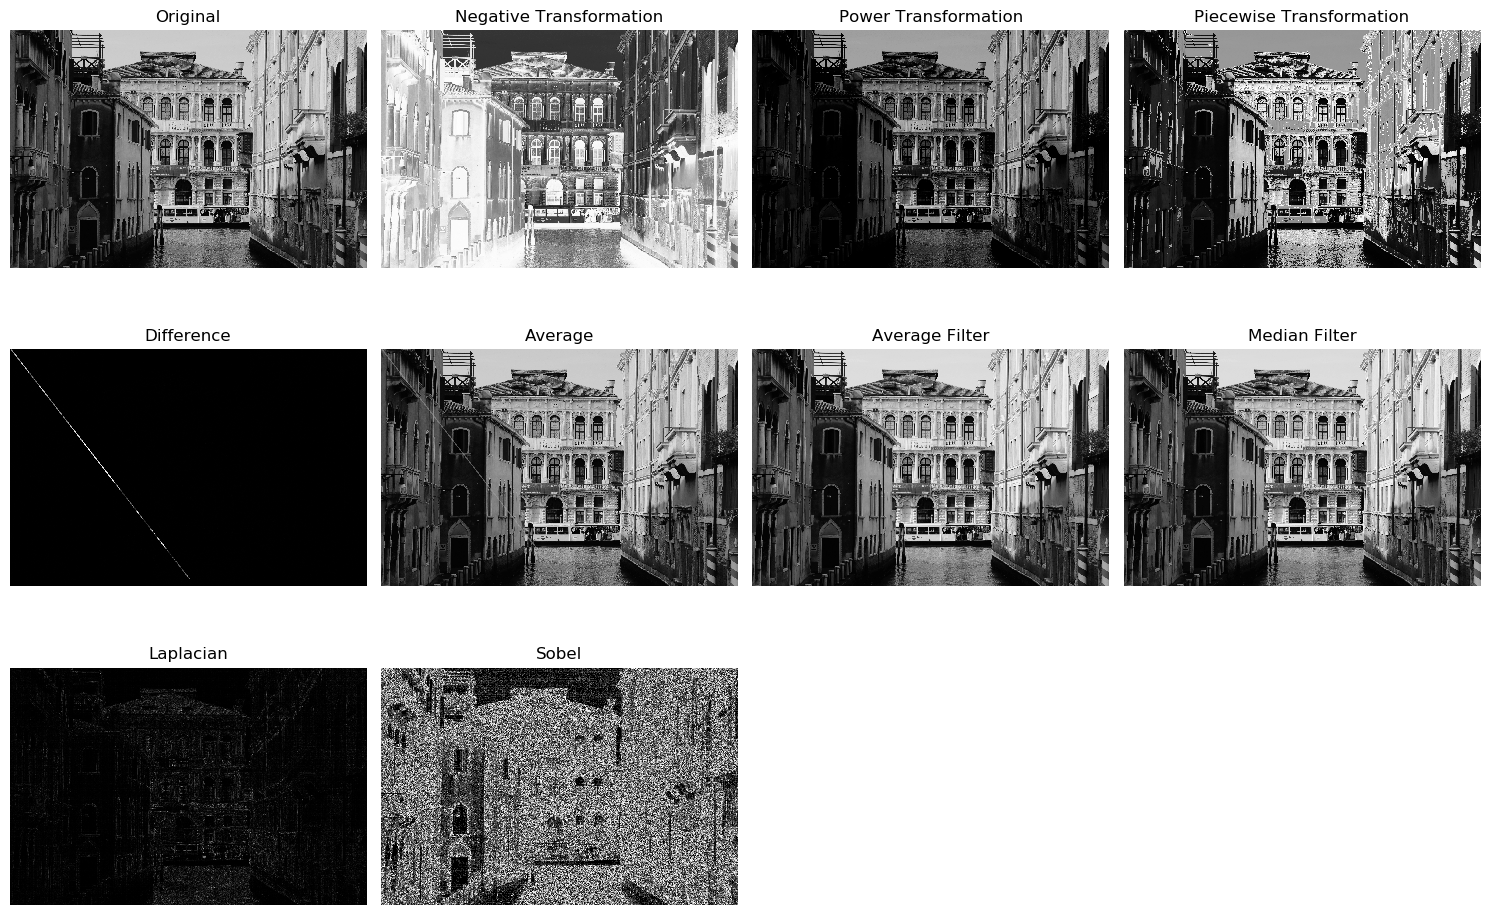

In [12]:
images = {
    'Original': image,
    'Negative Transformation': negative_image,
    'Power Transformation': power_transformed_image,
    'Piecewise Transformation': piecewise_image,
    'Difference': difference,
    'Average': average_image,
    'Average Filter': average_filtered_image,
    'Median Filter': median_filtered_image,
    'Laplacian': laplacian,
    'Sobel': sobel
}

plt.figure(figsize=(15, 10))
for i, (title, img) in enumerate(images.items(), 1):
    plt.subplot(3, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()